In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import regex as re

In [2]:
path = r'data_telur/'

In [3]:
def focus_img(src):
    #baca image
    img = plt.imread(r'{}'.format(src))
    
    #merubah image ke grayscale
    gray_img = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            value = np.sum(img[i,j])/3
            gray_img[i,j] = value
            
    #threshold image
    gray_treshold = gray_img < 240
    
    #mengubah dalam nilai bit
    telur_bit = np.zeros((gray_treshold.shape[0],gray_treshold.shape[1]))
    for i in range(telur_bit.shape[0]):
        for j in range(telur_bit.shape[1]):
            if gray_treshold[i,j] == True:
                telur_bit[i,j] = 255
            else:
                telur_bit[i,j] =0
    
    # Menghilangkan bintik2 yang terbaca dari threshold jika terbaca
    bintik_noise = cv2.morphologyEx(telur_bit, cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
    
    #mengambil baris dan colum yang berisikan nilai threshold
    baris_awal = None
    baris_akhir = None

    column_awal = None
    column_akhir = None

    barisList = []
    columnList = []

    for baris in range(bintik_noise.shape[0]):
        for column in range(bintik_noise.shape[1]):
            if bintik_noise[baris,column] == 255:
                barisList.append(baris)
                columnList.append(column)

    baris_awal = min(barisList)
    baris_akhir = max(barisList)

    column_awal = min(columnList)
    column_akhir = max(columnList)
    
    #mengambil resize

    telurRGB_resize = img[baris_awal:baris_akhir, column_awal:column_akhir]
    return telurRGB_resize
#     plt.imshow(telurRGB_resize, cmap='gray')

def meanRGB(src):
    gambar = focus_img(src)
    pattern = re.compile(r'/(\D+\d+\W\D+)')
    katagori = pattern.search(src).group(1)
    red = []
    green = []
    blue = []

    for i in range(gambar.shape[0]):
        for j in range(gambar.shape[1]):
            for k in range(gambar.shape[2]):
                if k == 0:
                    red.append(gambar[i,j,k])
                elif k == 1:
                    green.append(gambar[i,j,k])
                elif k == 2:
                    blue.append(gambar[i,j,k])
    mean_red = sum(red)/len(red)
    mean_green = sum(green)/len(green)
    mean_blue = sum(blue)/len(blue)
    
    return mean_red,mean_green, mean_blue, katagori

def meanDatapath():
    tupl = []
    for __,__,filenames in os.walk(path):
        for filename in filenames:        
            data= path+filename       
            tupl.append(meanRGB(data))
    data = pd.DataFrame(data=tupl, columns="Red Green Blue katagori".split())
    return data

def cariGambar(index):
    plt.imshow(focus_img('data_telur/'+data.iloc[index,-1]),cmap='gray')
    baca = data.drop(index, axis=0)
    data_baca =  data.iloc[index,:-1]
    return baca, data_baca

def list_euclidean(baca, data_baca):
    euclidean_list = []
    for i in range(0,baca.shape[0]):
        data_in = np.array(data_baca[:])
        data_banding = np.array(baca.iloc[i,:-1])
        euclidean = np.sqrt(np.sum(np.square(data_in - data_banding)))
        euclidean_list.append([euclidean,i])    
    return euclidean_list

def sortD0(val):
    return val[0]

def dataTerbaik():
    euc = list_euclidean(baca, data_baca)
    euc.sort(key=sortD0)
    sort_euclidean = pd.DataFrame(euc, columns=['Euclidean','index'])
    terbaik = sort_euclidean[:6]
    return terbaik

In [4]:
data = meanDatapath()
data

,Red,Green,Blue,katagori
0,213.370926,164.613495,136.948494,ayam1.jpg
1,185.996864,140.650087,108.490963,ayam10.jpg
2,230.824313,196.295404,174.532222,ayam2.jpg
3,236.523780,182.707165,138.786549,ayam3.jpg
4,147.801897,110.639250,82.327208,ayam4.jpg
5,232.884580,187.299086,152.173457,ayam5.jpg
6,178.786296,135.021116,100.893659,ayam6.jpg
7,169.330835,126.294065,103.915637,ayam7.jpg
8,88.319471,62.646253,53.054670,ayam8.jpg
9,211.638262,178.390809,139.042378,ayam9.jpg


In [5]:
# def euclid(data):
#     euclidean_list = []

#     for i in range(1,data.shape[0]):
#         data_in = np.array(data.iloc[0,:-1])
#         data_banding = np.array(data.iloc[i,:-1])
#         euclidean = np.sqrt(np.sum(np.square(data_in - data_banding)))
#         euclidean_list.append(euclidean)
#     return euclidean_list

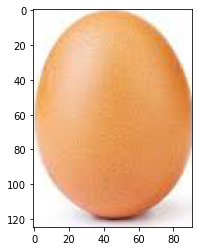

In [12]:
baca, data_baca = cariGambar(3)

In [13]:
dataTerbaik()

,Euclidean,index
0,14.612967,4
1,25.258373,8
2,25.642974,26
3,29.441705,0
4,38.663643,2
5,48.007896,39


([], [])

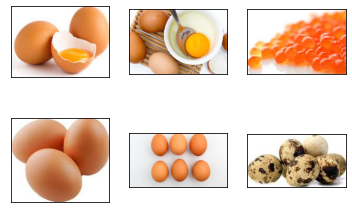

In [14]:
plt.figure(1)

plt.subplot(231)
plt.imshow(focus_img('data_telur/'+baca.iloc[dataTerbaik().loc[0,'index'],-1]),cmap='gray')
plt.xticks([])
plt.yticks([])


plt.subplot(232)
plt.imshow(focus_img('data_telur/'+baca.iloc[dataTerbaik().loc[1,'index'],-1]),cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(focus_img('data_telur/'+baca.iloc[dataTerbaik().loc[2,'index'],-1]),cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(focus_img('data_telur/'+baca.iloc[dataTerbaik().loc[3,'index'],-1]),cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(235)
plt.imshow(focus_img('data_telur/'+baca.iloc[dataTerbaik().loc[4,'index'],-1]),cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(236)
plt.imshow(focus_img('data_telur/'+baca.iloc[dataTerbaik().loc[5,'index'],-1]),cmap='gray')
plt.xticks([])
plt.yticks([])
